# Polynomial Regression

__First we need some data. Let us use the Yacht Hydrodynamics Data Set provided on eCampus.__ __"yacht_hydrodynamics.data"__

Data from: Dua, D. and Karra Taniskidou, E. (2017). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
http://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics# 

__Below is the file description.__
Variations concern hull geometry coefficients and the Froude number:
1. Longitudinal position of the center of buoyancy, adimensional. (CB)
2. Prismatic coefficient, adimensional. (PrismCoeff)
3. Length-displacement ratio, adimensional. (LbyD)
4. Beam-draught ratio, adimensional. (BbyT)
5. Length-beam ratio, adimensional. (LbyB)
6. Froude number, adimensional. (FrNo)
7. Residuary resistance per unit weight of displacement, adimensional (RRes)


__Let's start by importing some libraries and examining the data.__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

__Let us set Path and Read All data from Excel File__

In [2]:
import os
path = os.getcwd() + '\\yacht_hydrodynamics.data'
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html
data = pd.read_csv(path, sep='\s+',  header = None) 
data.head()

,0,1,2,3,4,5,6
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


In [3]:
data.columns=["CB","PrismCoeff","LbyD","BbyT","LbyB","FrNo","RRes"]
data.head()

,CB,PrismCoeff,LbyD,BbyT,LbyB,FrNo,RRes
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


In [4]:
data.describe()

,CB,PrismCoeff,LbyD,BbyT,LbyB,FrNo,RRes
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,-2.381818,0.564136,4.788636,3.936818,3.206818,0.287500,10.495357
std,1.513219,0.023290,0.253057,0.548193,0.247998,0.100942,15.160490
min,-5.000000,0.530000,4.340000,2.810000,2.730000,0.125000,0.010000
25%,-2.400000,0.546000,4.770000,3.750000,3.150000,0.200000,0.777500
50%,-2.300000,0.565000,4.780000,3.955000,3.150000,0.287500,3.065000
75%,-2.300000,0.574000,5.100000,4.170000,3.510000,0.375000,12.815000
max,0.000000,0.600000,5.140000,5.350000,3.640000,0.450000,62.420000


<AxesSubplot:xlabel='CB', ylabel='RRes'>

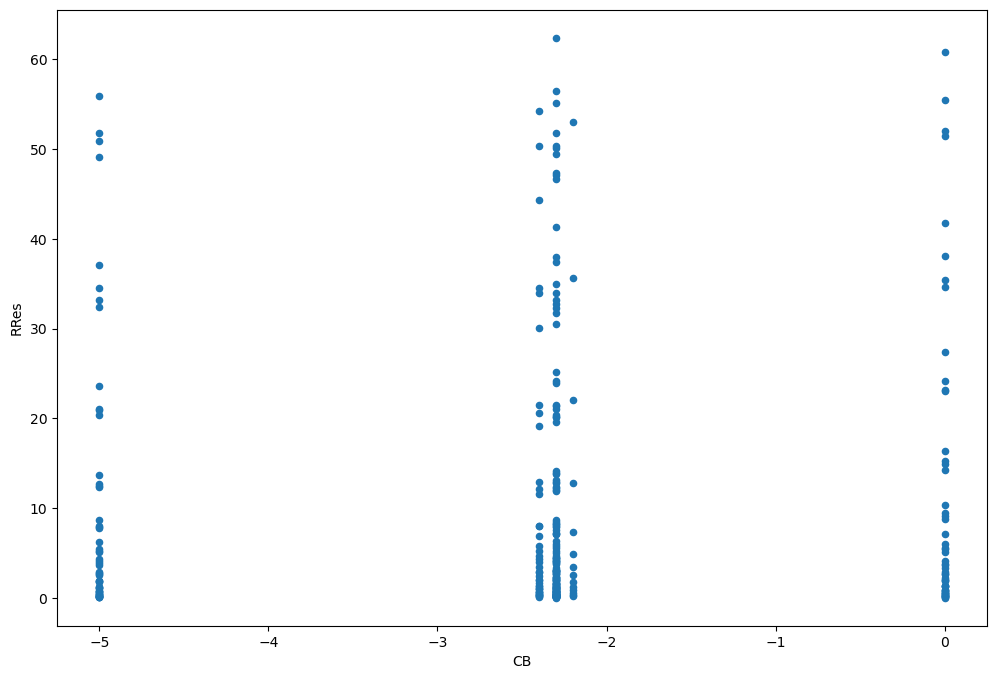

In [5]:
data.plot(kind='scatter', x='CB', y='RRes', figsize=(12,8))

<AxesSubplot:xlabel='PrismCoeff', ylabel='RRes'>

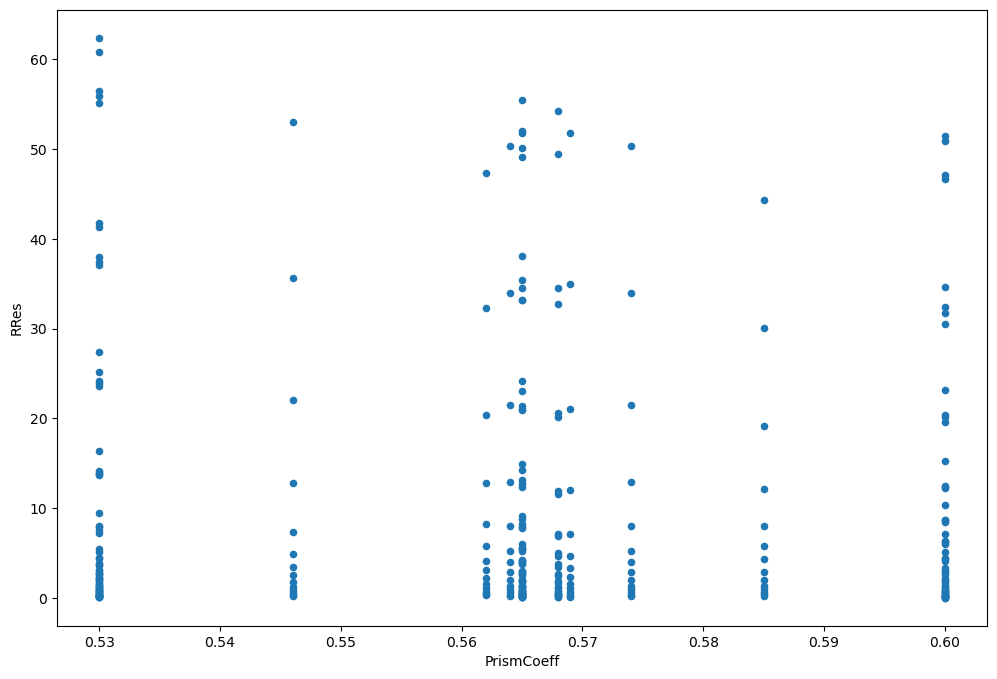

In [6]:
data.plot(kind='scatter', x='PrismCoeff', y='RRes', figsize=(12,8))

<AxesSubplot:xlabel='LbyD', ylabel='RRes'>

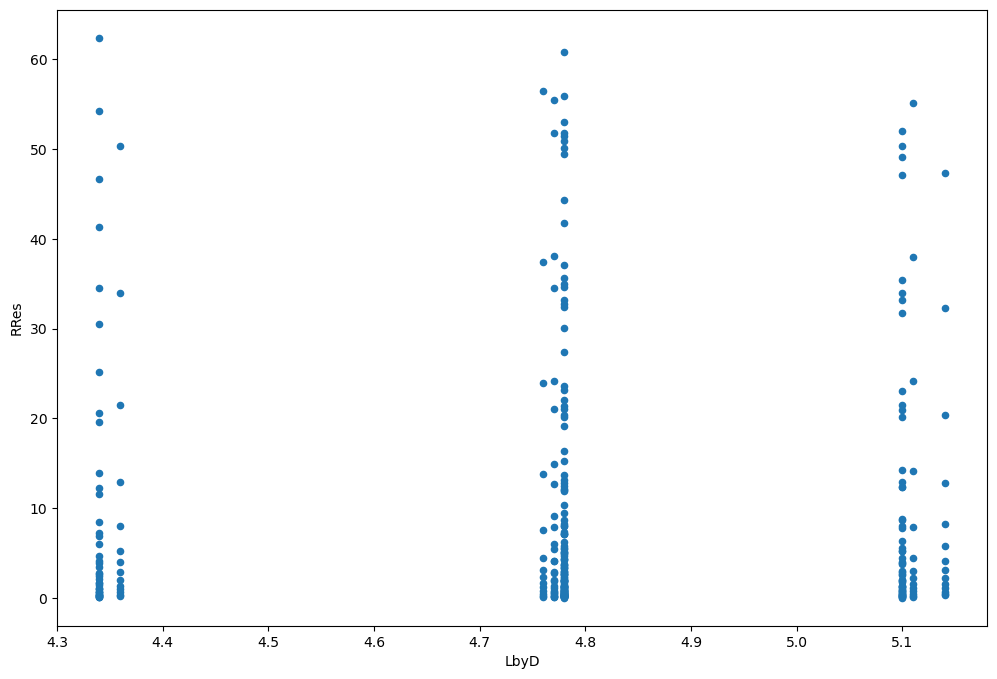

In [7]:
data.plot(kind='scatter', x='LbyD', y='RRes', figsize=(12,8))

<AxesSubplot:xlabel='BbyT', ylabel='RRes'>

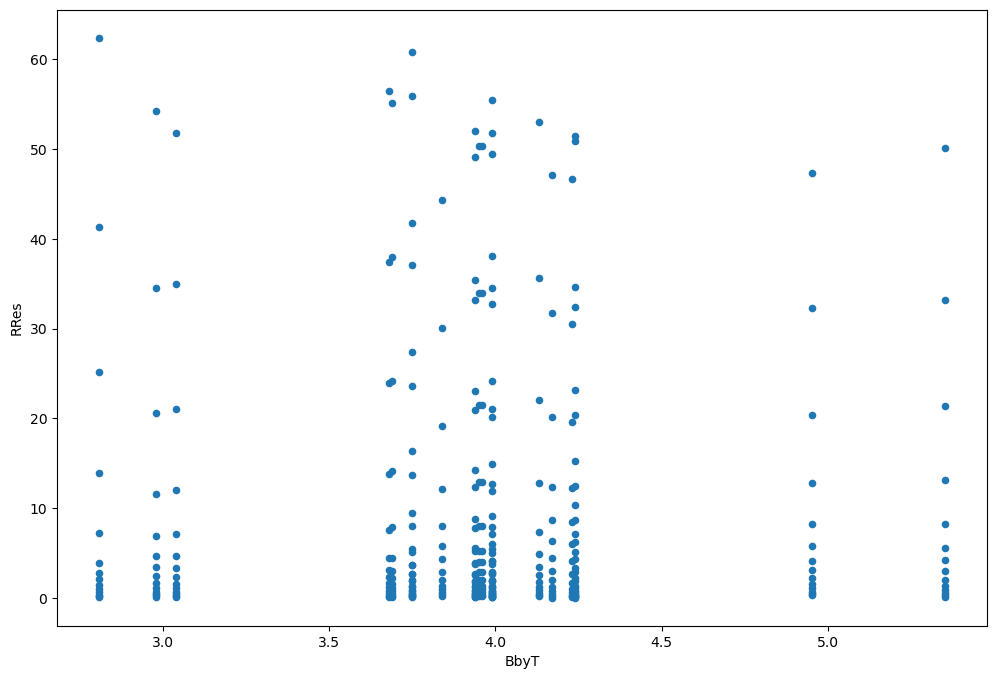

In [8]:
data.plot(kind='scatter', x='BbyT', y='RRes', figsize=(12,8))

<AxesSubplot:xlabel='LbyB', ylabel='RRes'>

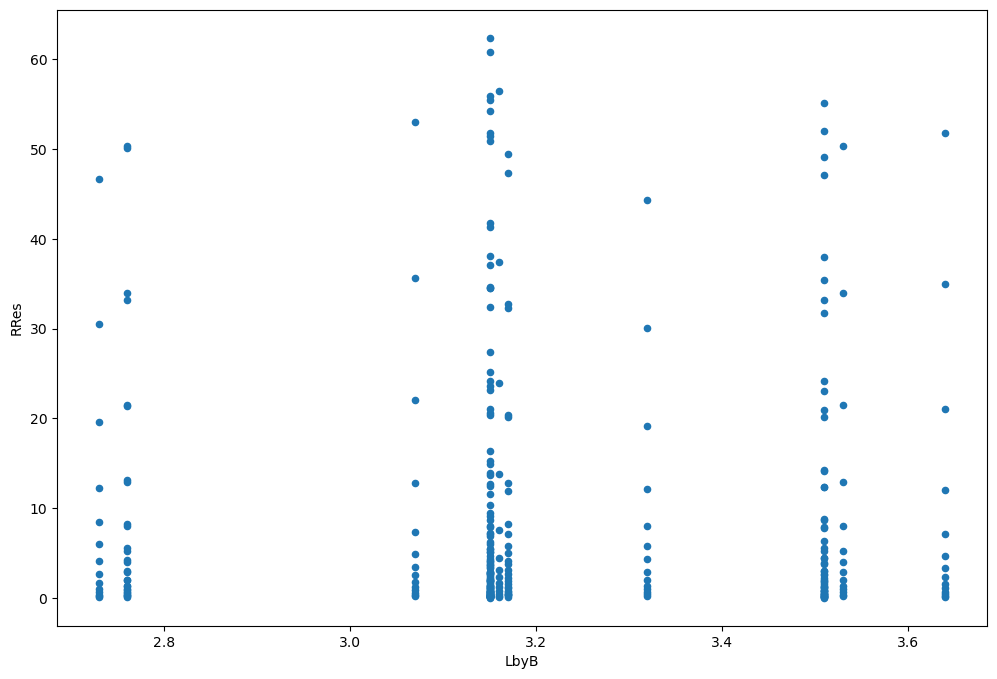

In [9]:
data.plot(kind='scatter', x='LbyB', y='RRes', figsize=(12,8))

<AxesSubplot:xlabel='FrNo', ylabel='RRes'>

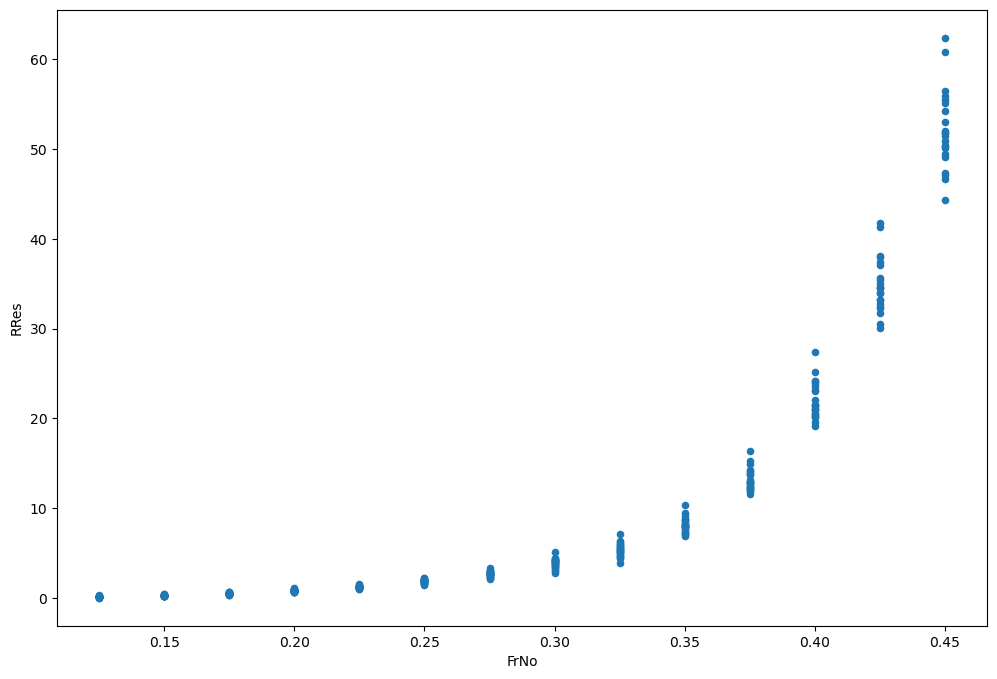

In [10]:
data.plot(kind='scatter', x='FrNo', y='RRes', figsize=(12,8))

__Extract Required Data__

In [11]:
# Assigning dataset to template X & y
X = data.iloc[:, :-1].values # All except last column
y = data.iloc[:, -1].values # Last Column

In [12]:
print(X[0:4,:])

[[-2.3    0.568  4.78   3.99   3.17   0.125]
 [-2.3    0.568  4.78   3.99   3.17   0.15 ]
 [-2.3    0.568  4.78   3.99   3.17   0.175]
 [-2.3    0.568  4.78   3.99   3.17   0.2  ]]


In [13]:
print(y[0:4])

[0.11 0.27 0.47 0.78]


In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Polynomial MODEL ##

In [15]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4)
# Generate a new feature matrix consisting of all polynomial combinations of the features
# with degree less than or equal to the specified degree. For example, if an input sample
# is two dimensional and of the form [a, b], the degree-2 polynomial features are
# [1, a, b, a^2, ab, b^2].

X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_Poly = LinearRegression()
lin_reg_Poly.fit(X_poly, y_train)
X_poly.shape

(246, 210)

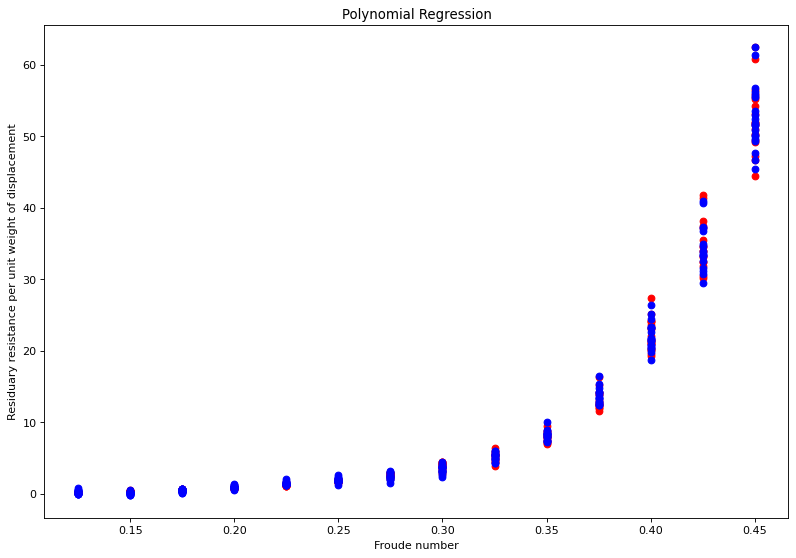

In [16]:
# Visualising the Polynomial Regression results
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(X_train[:,-1], y_train, color = 'red')
plt.scatter(X_train[:,-1], lin_reg_Poly.predict(poly_reg.fit_transform(X_train)), color = 'blue')
#plt.plot(X_train[:,-1], lin_reg_Poly.predict(poly_reg.fit_transform(X_train)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Froude number')
plt.ylabel('Residuary resistance per unit weight of displacement')
plt.show()

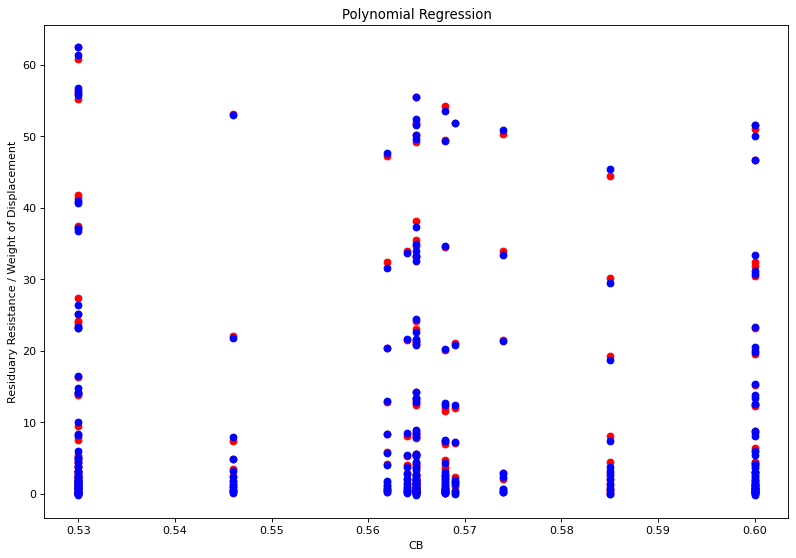

In [17]:
# Visualising the Polynomial Regression results
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(X_train[:,1], y_train, color = 'red')
plt.scatter(X_train[:,1], lin_reg_Poly.predict(poly_reg.fit_transform(X_train)), color = 'blue')
#plt.plot(X_train[:,-1], lin_reg_Poly.predict(poly_reg.fit_transform(X_train)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('CB')
plt.ylabel('Residuary Resistance / Weight of Displacement')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n' )
lin_reg_Poly.coef_

Coefficients: 



array([-8.04200393e-02, -8.47116230e+10,  5.84158254e+09,  1.50480313e+09,
        4.71663836e+08, -3.60614479e+09,  5.10223429e+08, -2.85418691e+09,
        4.02298413e+07, -5.82948657e+08,  6.92186416e+08, -1.26068722e+09,
       -5.72666314e+08,  2.41263867e+09, -2.04108745e+09, -5.88913855e+07,
       -8.07681734e+08, -2.13665263e+07,  1.64354675e+09,  2.55439246e+08,
       -1.13055065e+09, -9.41520691e+07, -1.13678882e+09, -5.61752266e+08,
       -6.37460786e+07, -9.95658830e+08, -2.50730380e+07,  2.71320424e+04,
        2.29157362e+08, -5.67893459e+08, -6.92171132e+08, -2.40103195e+09,
       -1.70026584e+09, -7.27289310e+07,  8.04931192e+07,  6.94204864e+08,
        2.84392695e+08,  4.91750068e+08,  4.37995891e+07,  4.72036813e+08,
       -3.73813732e+08,  2.30753406e+09,  1.60042919e+08, -1.35221227e+09,
        4.04742322e+08,  4.11690564e+07,  1.36115815e+09, -2.14715627e+07,
       -9.79513019e+01, -1.84174579e+07, -1.63733029e+08, -6.46871516e+07,
       -1.53100303e+08, -

In [19]:
print('Coefficients Intercept: %.6f' % lin_reg_Poly.intercept_)
# The mean squared error
print("Mean squared error (Train): %.6f"
      % mean_squared_error(y_train, lin_reg_Poly.predict(poly_reg.fit_transform(X_train))))
print("Mean squared error (Test): %.6f"
      % mean_squared_error(y_test, lin_reg_Poly.predict(poly_reg.fit_transform(X_test))))
# Explained variance score: 1 is perfect prediction
# Variance on Test
R2 = r2_score(y_test, lin_reg_Poly.predict(poly_reg.fit_transform(X_test)))
print('Variance score: %.6f' % R2)

PolyCols = poly_reg.get_feature_names(data.columns) # get_feature_names is deprecated
# PolyCols = poly_reg.get_feature_names_out(data.columns)
n = len(PolyCols)
r,c = X_train.shape
m = r
Adjusted_R2 = 1-(1-R2*R2)*((m-1)/(m-n-1))
print('Adjusted_R2: %.6f' % Adjusted_R2)

Coefficients Intercept: -108800715329.676529
Mean squared error (Train): 0.141071
Mean squared error (Test): 0.471899
Variance score: 0.996730
Adjusted_R2: 0.954301


C:\Users\PaulMKoola\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
print("No of Columns: ",len(PolyCols))
print(PolyCols)

No of Columns:  210
['1', 'CB', 'PrismCoeff', 'LbyD', 'BbyT', 'LbyB', 'FrNo', 'CB^2', 'CB PrismCoeff', 'CB LbyD', 'CB BbyT', 'CB LbyB', 'CB FrNo', 'PrismCoeff^2', 'PrismCoeff LbyD', 'PrismCoeff BbyT', 'PrismCoeff LbyB', 'PrismCoeff FrNo', 'LbyD^2', 'LbyD BbyT', 'LbyD LbyB', 'LbyD FrNo', 'BbyT^2', 'BbyT LbyB', 'BbyT FrNo', 'LbyB^2', 'LbyB FrNo', 'FrNo^2', 'CB^3', 'CB^2 PrismCoeff', 'CB^2 LbyD', 'CB^2 BbyT', 'CB^2 LbyB', 'CB^2 FrNo', 'CB PrismCoeff^2', 'CB PrismCoeff LbyD', 'CB PrismCoeff BbyT', 'CB PrismCoeff LbyB', 'CB PrismCoeff FrNo', 'CB LbyD^2', 'CB LbyD BbyT', 'CB LbyD LbyB', 'CB LbyD FrNo', 'CB BbyT^2', 'CB BbyT LbyB', 'CB BbyT FrNo', 'CB LbyB^2', 'CB LbyB FrNo', 'CB FrNo^2', 'PrismCoeff^3', 'PrismCoeff^2 LbyD', 'PrismCoeff^2 BbyT', 'PrismCoeff^2 LbyB', 'PrismCoeff^2 FrNo', 'PrismCoeff LbyD^2', 'PrismCoeff LbyD BbyT', 'PrismCoeff LbyD LbyB', 'PrismCoeff LbyD FrNo', 'PrismCoeff BbyT^2', 'PrismCoeff BbyT LbyB', 'PrismCoeff BbyT FrNo', 'PrismCoeff LbyB^2', 'PrismCoeff LbyB FrNo', 'P

## Simpler Polynomial Model

In [21]:
# # Fitting Simple Linear Regression to the Training set
# from sklearn.linear_model import LinearRegression
# # Fitting Polynomial Regression to the dataset
# from sklearn.preprocessing import PolynomialFeatures

# poly_reg = PolynomialFeatures(degree = 4)
# # Generate a new feature matrix consisting of all polynomial combinations of the features
# # with degree less than or equal to the specified degree. For example, if an input sample
# # is two dimensional and of the form [a, b], the degree-2 polynomial features are
# # [1, a, b, a^2, ab, b^2].

# X_poly = poly_reg.fit_transform(X_train)
FrNo = X_train[:, -1]
FrNo = FrNo[:, np.newaxis]

FrNoTEST = X_test[:, -1]
FrNoTEST = FrNoTEST[:, np.newaxis]

# FrNo.reshape(len(FrNo), -1) # Reshape to 2D array from 1D array
print(FrNo.shape)

X_poly_FrNo = poly_reg.fit_transform(FrNo) # Last Column Fr. No.
poly_reg.fit(X_poly_FrNo, y_train)
lin_reg_Poly_FrNo = LinearRegression()
lin_reg_Poly_FrNo.fit(X_poly_FrNo, y_train)

(246, 1)


LinearRegression()

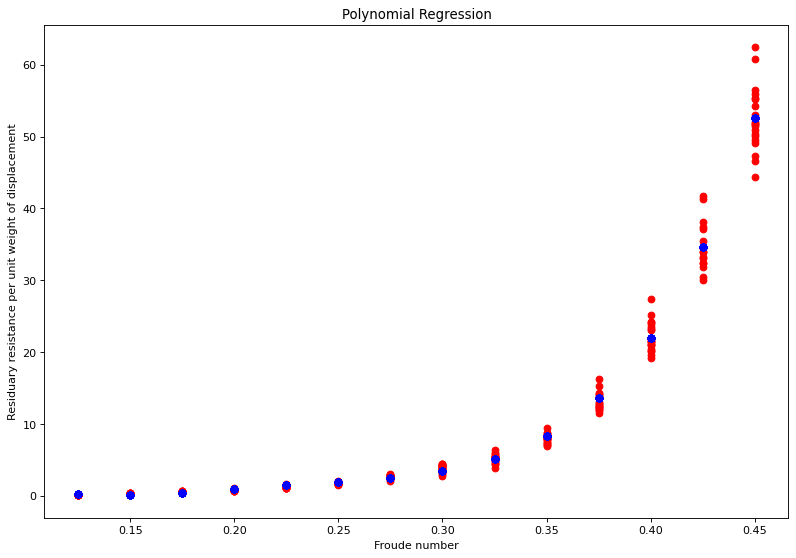

In [22]:
# Visualising the Polynomial Regression results
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(X_train[:,-1], y_train, color = 'red')
plt.scatter(X_train[:,-1], lin_reg_Poly_FrNo.predict(X_poly_FrNo), color = 'blue')
#plt.plot(X_train[:,-1], lin_reg_Poly.predict(poly_reg.fit_transform(X_train)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Froude number')
plt.ylabel('Residuary resistance per unit weight of displacement')
plt.show()

In [23]:
print('Coefficients Intercept: %.6f' % lin_reg_Poly_FrNo.intercept_)
# The mean squared error
print("Mean squared error (Train): %.6f"
      % mean_squared_error(y_train, lin_reg_Poly_FrNo.predict(poly_reg.fit_transform(FrNo))))
print("Mean squared error (Test): %.6f"
      % mean_squared_error(y_test, lin_reg_Poly_FrNo.predict(poly_reg.fit_transform(FrNoTEST))))
# Explained variance score: 1 is perfect prediction
# Variance on Test
R2_FrNo = r2_score(y_test, lin_reg_Poly_FrNo.predict(poly_reg.fit_transform(FrNoTEST)))
print('Variance score: %.6f' % R2_FrNo)

PolyCols_FrNo = poly_reg.get_feature_names("FrNo")
print(PolyCols_FrNo)
n = len(PolyCols_FrNo)
r,c = FrNo.shape
m = r
Adjusted_R2 = 1-(1-R2*R2)*((m-1)/(m-n-1))
print('Adjusted_R2: %.6f' % Adjusted_R2)

Coefficients Intercept: 32.623635
Mean squared error (Train): 2.844236
Mean squared error (Test): 1.283547
Variance score: 0.991107
['1', 'F', 'F^2', 'F^3', 'F^4']
Adjusted_R2: 0.993336


C:\Users\PaulMKoola\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
# The coefficients
print('Coefficients: \n' )
lin_reg_Poly_FrNo.coef_

Coefficients: 



array([     0.        ,   -657.57728287,   4768.88463832, -14754.40228526,
        16939.87903076])